In [19]:
import cooler
import numpy as np
import pandas as pd
import cooltools.eigdecomp
# import gene_count
import eigendecomposition
import mirnylib.plotting
%matplotlib notebook

In [ ]:
# imp.reload(batch_eigdecomp)
lams, vectors = eigendecomposition.batch_process(
    '/net/levsha/share/lab/dekkerU54/coolers/U54-100716-HFF-DSG-DpnII.100000.cool', 'hg19', savepath=None)

In [14]:
c = cooler.Cooler('/net/levsha/share/lab/dekkerU54/new_files/U54-HFF-plate-DSG-DdeI-20160812-R1-T1__hg38.hg38.mapq_30.1000.mcool::/resolutions/1000000')

In [26]:
part = np.r_[[c.offset(chrom) for chrom in c.chromnames[0:23]]]
part

array([   0,  249,  492,  691,  882, 1064, 1235, 1395, 1541, 1680, 1814,
       1950, 2084, 2199, 2307, 2409, 2500, 2584, 2665, 2724, 2789, 2836,
       2887])

In [25]:
lo = part[0]
hi = part[-1]
A = c.matrix(balance=True)[lo:hi, lo:hi]

<IPython.core.display.Javascript object>


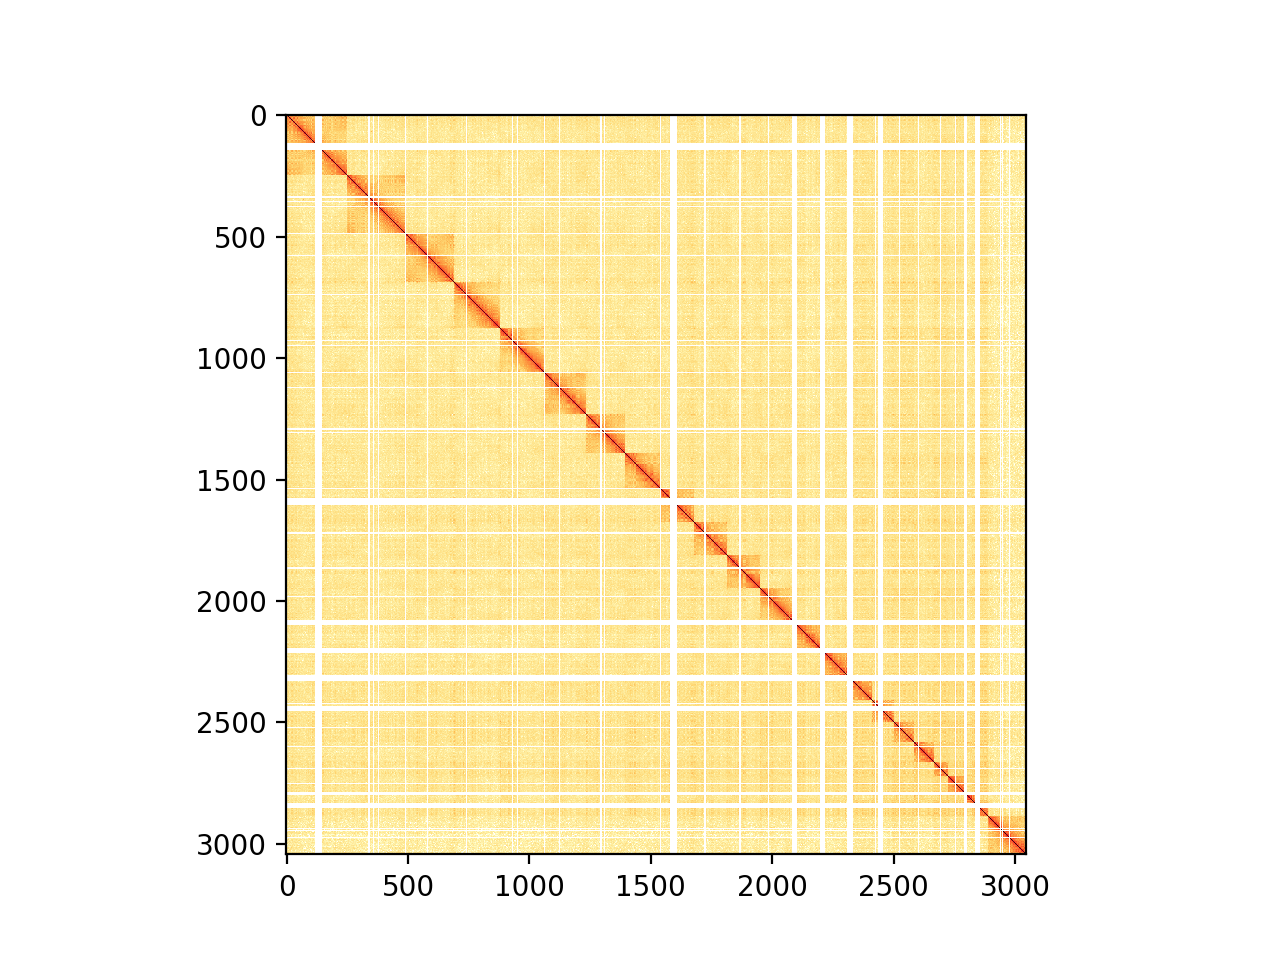

/home/sameer/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [23]:
plt.figure()
plt.imshow(np.log10(A), cmap='fall')

In [ ]:
# lams = lams[0]
vector = vectors[['chrom', 'start', 'end', 'E1']]
vector['label'] = vector['E1'].apply(lambda x: 'A' if x>= 0 else 'nan' if np.isnan(x) else 'B')
vector

In [ ]:
vector = batch_eigdecomp.condense_eigenvector(vector)
vector = vector[vector.label != 'nan']
vector

In [ ]:
bins = c.bins()[:]

In [ ]:
genes = gene_count.cooler_count_genes(c, 'hg19')
genes

In [ ]:
bins['gene_count'] = genes['gene_count']

In [ ]:
lams, vectors = cooltools.eigdecomp.cooler_cis_eig(c, bins, phasing_track_col='gene_count', sort_metric='pearsonr')

In [ ]:
vectors

In [ ]:
assert np.all(np.where(np.isnan(vector))[0] == np.where(~mask)[0])

In [ ]:
pureVector = vector[mask]
pureVector

In [ ]:
percentile_count=10
min_percent=2.5
max_percent=97.5
percentiles = np.percentile(pureVector, np.linspace(min_percent, max_percent, percentile_count+1))
percentiles

In [ ]:
percent_vector = np.searchsorted(percentiles, vector).astype(np.float64)
percent_vector = percent_vector - 1.0 
percent_vector

In [ ]:
percent_vector[percent_vector < 0] = np.nan
percent_vector[percent_vector >= percentile_count] = np.nan
percent_vector

In [ ]:
ar = np.arange(0,len(mat))
diag_mask = np.abs(ar[:,None] - ar[None,:])
diag_mask[diag_mask<=20] = False
diag_mask[diag_mask>20] = True
diag_mask

In [ ]:
bin_index_saddleplot = percent_vector[:,None] * percentile_count + percent_vector[None,:]
to_remove = ~np.isfinite(bin_index_saddleplot) 
bin_index_saddleplot[to_remove] = percentile_count ** 2 
bin_index_saddleplot[diag_mask] = percentile_count ** 2
bin_index_saddleplot = bin_index_saddleplot.astype(int)
bin_index_saddleplot

In [ ]:
saddleplot1 = np.bincount(bin_index_saddleplot.flatten(), weights = mat.flatten(), minlength = percentile_count**2 + 1 ) / np.bincount(bin_index_saddleplot.flatten())
saddleplot1 = saddleplot1[-2::-1].reshape(percentile_count,percentile_count)

In [ ]:
%matplotlib notebook
plt.imshow(saddleplot1)

In [ ]:
import saddleplot as sp

In [ ]:
c = cooler.Cooler('/net/levsha/share/lab/dekkerHires/coolers/U54-END-DSG-HindIII-20161206.1000000.cool')

In [ ]:
vector1 = pd.read_hdf('/home/sameer/scalings_project/dekkerHires/coolers/eigdecomp/U54-END-DSG-HindIII-20161206.1000000.hdf5', key='max_vecs')

In [ ]:
imp.reload(sp)
sp.genome_comp_strength(c,vector1,dist_lim=20)

In [ ]:
%matplotlib notebook
plt.imshow(s-saddleplot1)